# k-means 군집분석

## 데이터 확인

In [1]:
# 패키지 불러오기
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import numpy as np
import pandas as pd

In [2]:
# 통신사 데이터 불러오기
excelFile = 'C:/Users/chunc/Desktop/데이터 샘플\파이널프로젝트 데이터/202211_202301_통신정보(쇼핑전처리).xlsx'
df = pd.read_excel(excelFile, usecols = 'A:L')
df.head()

,행정동코드,자치구,행정동,성별,연령대,총인구수,1인가구수,쇼핑 서비스 사용 미추정 인구수,쇼핑 서비스 사용일수,"쇼핑 서비스 사용일수: 4분위수, 25%","쇼핑 서비스 사용일수: 4분위수, 50%","쇼핑 서비스 사용일수: 4분위수, 75%"
0,1125070,강동구,둔촌1동,2,25,586.00,319.71,0.00,141.43,50.00,158.33,208.33
1,1102060,중구,을지로동,2,50,51.00,23.31,18.31,102.00,13.33,81.67,163.33
2,1125070,강동구,둔촌1동,1,25,740.00,355.32,52.86,127.95,43.33,81.67,201.67
3,1102057,중구,필동,2,75,152.00,61.90,82.61,34.21,3.33,18.33,30.00
4,1101067,종로구,창신1동,1,70,108.59,48.88,55.50,34.17,3.33,10.00,35.00


In [3]:
drop_col = ['행정동코드', '자치구', '행정동','쇼핑 서비스 사용일수: 4분위수, 25%',
       '쇼핑 서비스 사용일수: 4분위수, 50%', '쇼핑 서비스 사용일수: 4분위수, 75%']
new_df = df.drop(drop_col, axis = 1)
new_df.head()

,성별,연령대,총인구수,1인가구수,쇼핑 서비스 사용 미추정 인구수,쇼핑 서비스 사용일수
0,2,25,586.00,319.71,0.00,141.43
1,2,50,51.00,23.31,18.31,102.00
2,1,25,740.00,355.32,52.86,127.95
3,2,75,152.00,61.90,82.61,34.21
4,1,70,108.59,48.88,55.50,34.17


In [4]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, random_state = 0).fit(new_df)
new_df['cluster'] = kmeans.labels_

D:\Anaconda\envs\pythonEx\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


## 차원축소(주성분분석)

In [5]:
# 4개의 특성을 2차원으로 차원 축소
# PCA 객테를 생성하고, 주성분의 개수를 2개로 설정
pca = PCA(n_components = 2)

# 데이터를 사용하여 PCA를 수행하고, 변환된 결과를 저장
pca_transformed = pca.fit_transform(new_df)

# 변환된 결과를 데이터 프레임에 새로운 열로 추가
# 첫 번째 주성분 값을 'pca_x' 열에 저장
new_df['pca_x'] = pca_transformed[:, 0]

# 두 번째 주성분 값을 'pca_y' 열에 저장
new_df['pca_y'] = pca_transformed[:, 1]

new_df.head()

,성별,연령대,총인구수,1인가구수,쇼핑 서비스 사용 미추정 인구수,쇼핑 서비스 사용일수,cluster,pca_x,pca_y
0,2,25,586.00,319.71,0.00,141.43,0,-172.376472,184.587768
1,2,50,51.00,23.31,18.31,102.00,0,-764.430647,39.801414
2,1,25,740.00,355.32,52.86,127.95,1,-14.387335,195.795792
3,2,75,152.00,61.90,82.61,34.21,0,-660.326941,74.848760
4,1,70,108.59,48.88,55.50,34.17,0,-705.974535,66.398864


D:\Anaconda\envs\pythonEx\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


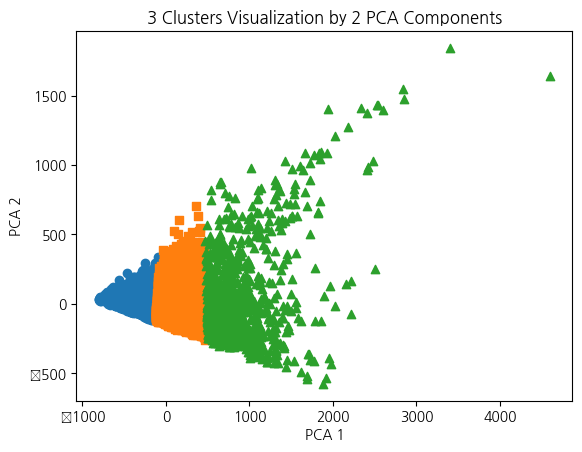

In [6]:
# 군집 값이 0, 1, 2인 경우마다 별도의 인덱스로 추출
marker0_ind = new_df[new_df['cluster'] == 0].index
marker1_ind = new_df[new_df['cluster'] == 1].index
marker2_ind = new_df[new_df['cluster'] == 2].index

# 군집 값 0, 1, 2에 해당하는 인덱스로 각 군집 레벨의 pca_x, pca_y 값 추출. o, s, ^ 로 마커 표시
plt.scatter(x = new_df.loc[marker0_ind, 'pca_x'], y = new_df.loc[marker0_ind, 'pca_y'], marker='o')
plt.scatter(x = new_df.loc[marker1_ind, 'pca_x'], y = new_df.loc[marker1_ind, 'pca_y'], marker='s')
plt.scatter(x = new_df.loc[marker2_ind, 'pca_x'], y = new_df.loc[marker2_ind, 'pca_y'], marker='^')

plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('3 Clusters Visualization by 2 PCA Components')
plt.show()

## 개별 군집 실루엣 계수 확인

In [7]:
# KMeans 알고리즘으로 클러스터링을 수행(n_init: 초기 중심점 설정 횟수)
kmeans = KMeans(n_clusters = 3, n_init = 10, max_iter = 300, random_state = 0).fit(new_df)

# 클러스터링 결과를 iris데이터프레임에 추가
new_df['cluster'] = kmeans.labels_

# 각 데이터 포인트에 대한 실루엣 계수 계산
score_samples = silhouette_samples(new_df, new_df['cluster'])
print('silhouette_samples( ) return 값의 shape', score_samples.shape)

# 실루엣 계수를 iris데이터프레임에 추가
new_df['silhouette_coeff'] = score_samples

# 전체 데이터에 대한 평균 실루엣 계수를 계산
average_score = silhouette_score(new_df, new_df['cluster'])
print('Silhouette Anaysis Score: {0:.3f}'.format(average_score))

new_df.head()

silhouette_samples( ) return 값의 shape (10176,)
Silhouette Anaysis Score: 0.455


,성별,연령대,총인구수,1인가구수,쇼핑 서비스 사용 미추정 인구수,쇼핑 서비스 사용일수,cluster,pca_x,pca_y,silhouette_coeff
0,2,25,586.00,319.71,0.00,141.43,0,-172.376472,184.587768,0.260414
1,2,50,51.00,23.31,18.31,102.00,0,-764.430647,39.801414,0.545375
2,1,25,740.00,355.32,52.86,127.95,1,-14.387335,195.795792,0.197647
3,2,75,152.00,61.90,82.61,34.21,0,-660.326941,74.848760,0.604863
4,1,70,108.59,48.88,55.50,34.17,0,-705.974535,66.398864,0.579361


In [8]:
# 0번 군집의 실루엣 계수가 가장 높다
new_df.groupby('cluster')['silhouette_coeff'].mean()

cluster
0    0.532927
1    0.423240
2    0.279627
Name: silhouette_coeff, dtype: float64

In [9]:
#[부록] 여러개의 클러스터링 갯수를 List로 입력 받아 각각의 실루엣 계수를 면적으로 시각화한 함수 작성
def visualize_silhouette(cluster_lists, X_features): 
    
    from sklearn.datasets import make_blobs
    from sklearn.cluster import KMeans
    from sklearn.metrics import silhouette_samples, silhouette_score

    import matplotlib.pyplot as plt
    import matplotlib.cm as cm
    import math
    
    # 입력값으로 클러스터링 갯수들을 리스트로 받아서, 각 갯수별로 클러스터링을 적용하고 실루엣 개수를 구함
    n_cols = len(cluster_lists)
    
    # plt.subplots()으로 리스트에 기재된 클러스터링 수만큼의 sub figures를 가지는 axs 생성 
    fig, axs = plt.subplots(figsize=(4*n_cols, 4), nrows=1, ncols=n_cols)
    
    # 리스트에 기재된 클러스터링 갯수들을 차례로 iteration 수행하면서 실루엣 개수 시각화
    for ind, n_cluster in enumerate(cluster_lists):
        
        # KMeans 클러스터링 수행하고, 실루엣 스코어와 개별 데이터의 실루엣 값 계산. 
        clusterer = KMeans(n_clusters = n_cluster, n_init=10, max_iter=500, random_state=0)
        cluster_labels = clusterer.fit_predict(X_features)
        
        sil_avg = silhouette_score(X_features, cluster_labels)
        sil_values = silhouette_samples(X_features, cluster_labels)
        
        y_lower = 10
        axs[ind].set_title('Number of Cluster : '+ str(n_cluster)+'\n' \
                          'Silhouette Score :' + str(round(sil_avg,3)) )
        axs[ind].set_xlabel("The silhouette coefficient values")
        axs[ind].set_ylabel("Cluster label")
        axs[ind].set_xlim([-0.1, 1])
        axs[ind].set_ylim([0, len(X_features) + (n_cluster + 1) * 10])
        axs[ind].set_yticks([])  # Clear the yaxis labels / ticks
        axs[ind].set_xticks([0, 0.2, 0.4, 0.6, 0.8, 1])
        
        # 클러스터링 갯수별로 fill_betweenx( )형태의 막대 그래프 표현. 
        for i in range(n_cluster):
            ith_cluster_sil_values = sil_values[cluster_labels==i]
            ith_cluster_sil_values.sort()
            
            size_cluster_i = ith_cluster_sil_values.shape[0]
            y_upper = y_lower + size_cluster_i
            
            color = cm.nipy_spectral(float(i) / n_cluster)
            axs[ind].fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_sil_values, \
                                facecolor=color, edgecolor=color, alpha=0.7)
            axs[ind].text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
            y_lower = y_upper + 10
            
        axs[ind].axvline(x=sil_avg, color="red", linestyle="--")

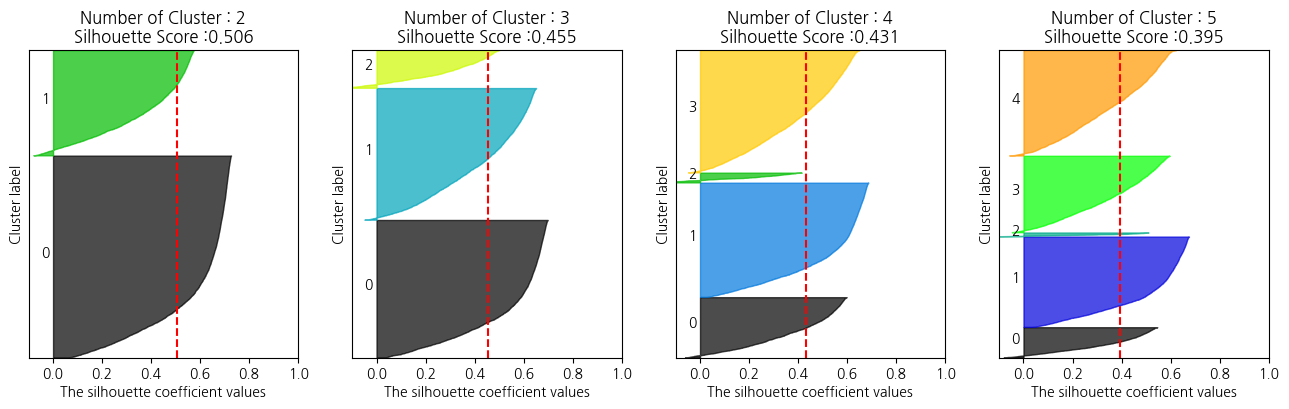

In [10]:
# 시각화 결과 보기
visualize_silhouette([ 2, 3, 4, 5 ], new_df)

## K-means 수행(로그화 x)

In [11]:
X_features = new_df.values

# 독립변수 대상으로 Standard Scaling
X_features_scaled = StandardScaler().fit_transform(X_features)

# 3개 cluster로 군집화하기 위한 KMeans 객체(kmeans) 생성
kmeans = KMeans(n_clusters = 3, n_init = 10, random_state = 0)

# 학습 및 군집화 후 해당 cluster 번호 라벨 도출
labels = kmeans.fit_predict(X_features_scaled)

# 생성된 cluster label을 'cluster_label'컬럼을 생성하여 저장
new_df['cluster_label'] = labels

# silhouette_score()에 X_features_scaled와 labels를 인자로 입력하여 모든 데이터 포인트에서의 실루엣 계수 평균 산출
print('Silhouette Score: {0:.3f}'.format(silhouette_score(X_features_scaled, labels)))

Silhouette Score: 0.265


In [12]:
### [부록] 각 실루엣 계수를 면적으로 시각화한 함수
def visualize_silhouette(cluster_lists, X_features): 
    
    from sklearn.cluster import KMeans
    from sklearn.metrics import silhouette_samples, silhouette_score

    import matplotlib.pyplot as plt
    import matplotlib.cm as cm
    import math
    
    # 입력값으로 클러스터링 갯수들을 리스트로 받아서, 각 갯수별로 클러스터링을 적용하고 실루엣 개수를 구함
    n_cols = len(cluster_lists)
    
    # plt.subplots()으로 리스트에 기재된 클러스터링 만큼의 sub figures를 가지는 axs 생성 
    fig, axs = plt.subplots(figsize=(4*n_cols, 4), nrows=1, ncols=n_cols)
    
    # 리스트에 기재된 클러스터링 갯수들을 차례로 iteration 수행하면서 실루엣 개수 시각화
    for ind, n_cluster in enumerate(cluster_lists):
        
        # KMeans 클러스터링 수행하고, 실루엣 스코어와 개별 데이터의 실루엣 값 계산.
        clusterer = KMeans(n_clusters = n_cluster, max_iter=500, random_state=0)  # 클러스터의 개수는 n_cluster, 최대 반복 횟수는 500, 난수 발생 시드는 0으로 설정
        
        # 데이터를 클러스터링 후 각 데이터 포인트에 해당하는 클러스터 레이블을 cluster_labels 객체에 저장
        cluster_labels = clusterer.fit_predict(X_features)

        sil_avg = silhouette_score(X_features, cluster_labels)  # 실루엣 스코어를 계산
        sil_values = silhouette_samples(X_features, cluster_labels)  # 각 데이터 포인트의 실루엣 계수를 계산
        
         # y축의 시작 위치를 설정
        y_lower = 10
        # 그래프의 제목 설정. 클러스터 개수와 실루엣 스코어 표시
        axs[ind].set_title('Number of Cluster : '+ str(n_cluster)+'\n' \
                          'Silhouette Score :' + str(round(sil_avg,3)) )
        # x축 레이블 설정
        axs[ind].set_xlabel("The silhouette coefficient values")
        # y축 레이블 설정
        axs[ind].set_ylabel("Cluster label")
        # x축 범위 설정
        axs[ind].set_xlim([-0.1, 1])
        # y축 범위 설정
        axs[ind].set_ylim([0, len(X_features) + (n_cluster + 1) * 10])
        # y축 눈금 숨김
        axs[ind].set_yticks([])
        # x축 눈금 설정 
        axs[ind].set_xticks([0, 0.2, 0.4, 0.6, 0.8, 1])
        
        # 클러스터링 갯수별로 fill_betweenx( )형태의 막대 그래프 표현. 
        # 클러스터링 갯수별로 반복
        for i in range(n_cluster):
            
            ith_cluster_sil_values = sil_values[cluster_labels==i]  # i번째 클러스터에 해당하는 데이터 포인터의 실루엣 계수 값 인덱싱
            ith_cluster_sil_values.sort()  # 실루엣 계수 값 정렬
            
            size_cluster_i = ith_cluster_sil_values.shape[0]  #  i번째 클러스터의 크기(데이터 포인트 개수) 산출
            
            y_upper = y_lower + size_cluster_i   # y축 상한값 설정
            
            color = cm.nipy_spectral(float(i) / n_cluster)  # i번째 클러스터에 해당하는 색상을 설정
            
            # i번째 클러스터의 실루엣 계수 시각화. x축=실루엣 계수, y축=클러스터 레이블
            axs[ind].fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_sil_values, \
                                facecolor=color, edgecolor=color, alpha=0.7)
            # i번째 클러스터 레이블 텍스트를 그래프 상에 출력
            axs[ind].text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

            y_lower = y_upper + 10    # 다음 클러스터의 y축 하한값을 설정 (클러스터 수가 늘어나므로)      

        axs[ind].axvline(x=sil_avg, color="red", linestyle="--")   # 전체 클러스터의 평균 실루엣 스코어를 빨간색 점선으로 표시


### [부록] 각 클러스터링 결과를 시각화한 함수

def visualize_kmeans_plot_multi(cluster_lists, X_features):
    
    from sklearn.cluster import KMeans
    from sklearn.decomposition import PCA
    import pandas as pd
    import numpy as np
    
    # plt.subplots()으로 리스트에 기재된 클러스터링 만큼의 sub figures를 가지는 axs 생성 
    # 클러스터 리스트의 길이 산출
    n_cols = len(cluster_lists)
    # 서브플롯 생성
    fig, axs = plt.subplots(figsize=(4*n_cols, 4), nrows=1, ncols=n_cols)
    
    # 입력 데이터의 feature가 여러개일 경우 2차원 데이터 시각화가 어려우므로 PCA 변환하여 2차원 시각화
    # 2차원 PCA 객체를 생성
    pca = PCA(n_components=2)
    # 원본 데이터를 2차원 PCA 축으로 변환(원본은 3차원)
    pca_transformed = pca.fit_transform(X_features)
    # 변환된 데이터를 컬럼 'PCA1','PCA2'를 지니는 데이터프레임으로 변환
    dataframe = pd.DataFrame(pca_transformed, columns=['PCA1','PCA2'])
    
     # 리스트에 기재된 클러스터링 갯수들을 차례로 iteration 수행하면서 KMeans 클러스터링 수행하고 시각화
    for ind, n_cluster in enumerate(cluster_lists):
        
        # KMeans 클러스터링으로 클러스터링 결과를 dataframe에 저장.
        # KMeans 클러스터링 객체 생성 
        clusterer = KMeans(n_clusters = n_cluster, max_iter=500, random_state=0)
        # PCA 변환된 데이터에 대하여 학습 및 클러스터 레이블 예측
        cluster_labels = clusterer.fit_predict(pca_transformed)
        # 데이터프레임에 클러스터 레이블 저장
        dataframe['cluster']=cluster_labels
        # 클러스터 레이블들의 유니크값 추출출
        unique_labels = np.unique(clusterer.labels_)
        # 클러스터별 마커 모양 지정
        markers=['o', 's', '^', 'x', '*']
        
        # 클러스터링 결과값별로 scatter plot 으로 시각화
        # 각 고유한 클러스터 레이블에 대하여 반복
        for label in unique_labels:
            # 현재 클러스터 레이블에 해당하는 데이터 인덱싱
            label_df = dataframe[dataframe['cluster']==label]
            # 클러스터 레이블이 -1(Noise)인 경우와 아닌 경우에 대한 범례(legend) 설정
            if label == -1:
                cluster_legend = 'Noise'
            else :
                cluster_legend = 'Cluster '+str(label)
            # 클러스터별로 산점도 작성(s=점의 크기)               
            axs[ind].scatter(x=label_df['PCA1'], y=label_df['PCA2'], s=70,\
                        edgecolor='k', marker=markers[label], label=cluster_legend)
        # 서브플롯 제목 설정
        axs[ind].set_title('Number of Cluster : '+ str(n_cluster))    
        # 범례를 오른쪽에 위치
        axs[ind].legend(loc='upper right')
    # 그래프 출력
    plt.show()

D:\Anaconda\envs\pythonEx\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
D:\Anaconda\envs\pythonEx\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
D:\Anaconda\envs\pythonEx\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
D:\Anaconda\envs\pythonEx\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
D:\Anaconda\envs\pythonEx\lib\site-packages\sklearn\

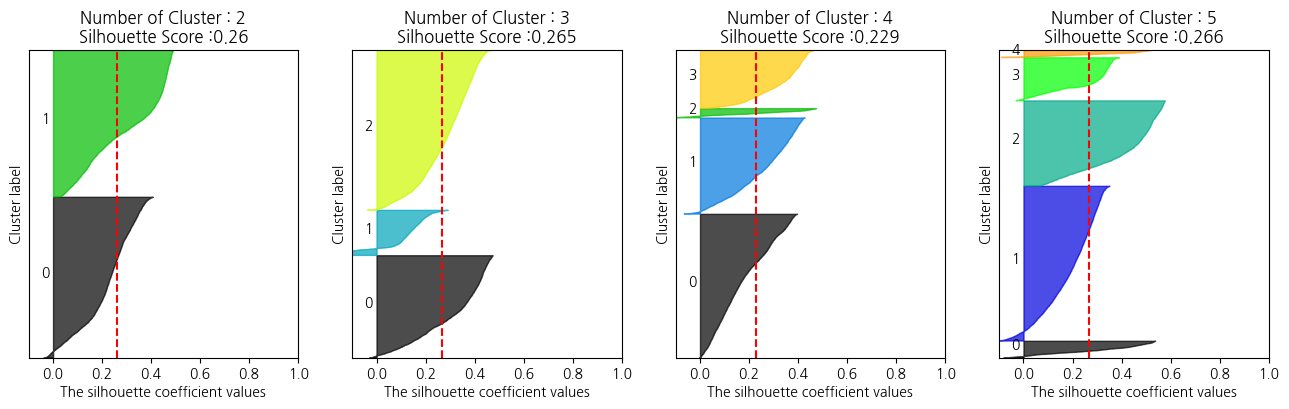

D:\Anaconda\envs\pythonEx\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


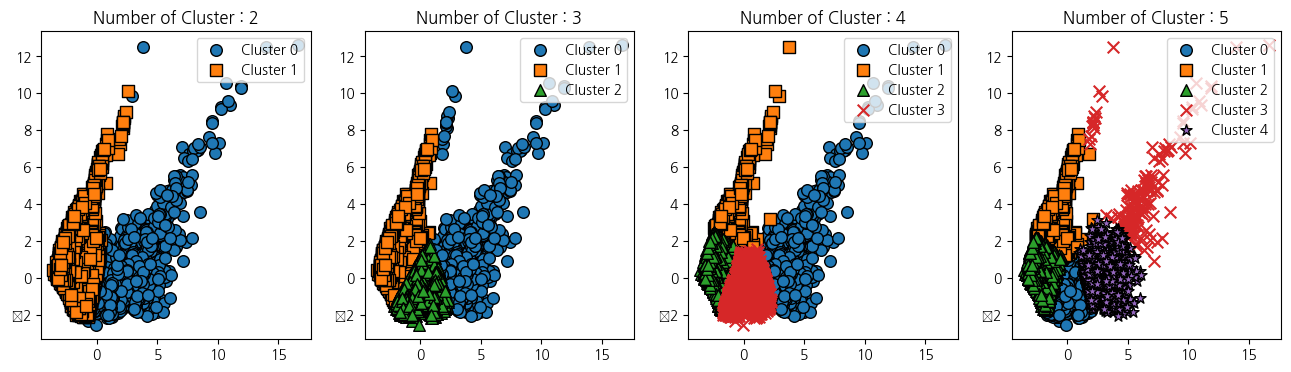

In [13]:
# 실루엣 계수 및 데이터 구성
visualize_silhouette([2, 3, 4, 5], X_features_scaled)
visualize_kmeans_plot_multi([2, 3, 4, 5], X_features_scaled)

## K-means 수행(로그화 o)

In [14]:
# 컬럼에 각각 로그 변환을 수행해준다

new_df['성별'] = np.log1p(new_df['성별'])
new_df['연령대'] = np.log1p(new_df['연령대'])
new_df['총인구수'] = np.log1p(new_df['총인구수'])
new_df['1인가구수'] = np.log1p(new_df['1인가구수'])
new_df['쇼핑 서비스 사용 미추정 인구수'] = np.log1p(new_df['쇼핑 서비스 사용 미추정 인구수'])
new_df['쇼핑 서비스 사용일수'] = np.log1p(new_df['쇼핑 서비스 사용일수'])


# Log화한 데이터에 StandardScaling 적용
# StandardScaler 객체에서 fit_transform() 메서드를 호출하여 스케일러를 데이터에 맞게 핏(fit)하고 스케일링 변환
X_features = new_df.values
X_features_scaled = StandardScaler().fit_transform(X_features)

# 클러스터 3개인 KMeans 객체 생성
kmeans = KMeans(n_clusters = 3, n_init = 10, random_state = 0)

# 학습 및 예측한 클러스터 라벨을 labels 객체에 저장
labels = kmeans.fit_predict(X_features_scaled)

# labels 객체의 내용을 cust_df의 cluster_label 컬럼에 저장
new_df['cluster_label'] = labels

# 실루엣 스코어 출력
print('Silhouette Score: {0:.3f}'.format(silhouette_score(X_features_scaled, labels)))

Silhouette Score: 0.297


D:\Anaconda\envs\pythonEx\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
D:\Anaconda\envs\pythonEx\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
D:\Anaconda\envs\pythonEx\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
D:\Anaconda\envs\pythonEx\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
D:\Anaconda\envs\pythonEx\lib\site-packages\sklearn\

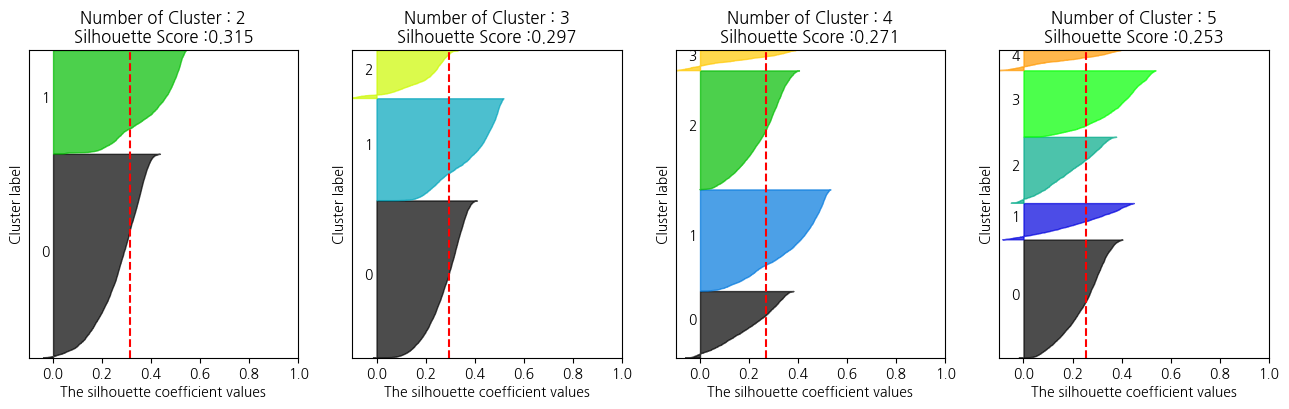

D:\Anaconda\envs\pythonEx\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


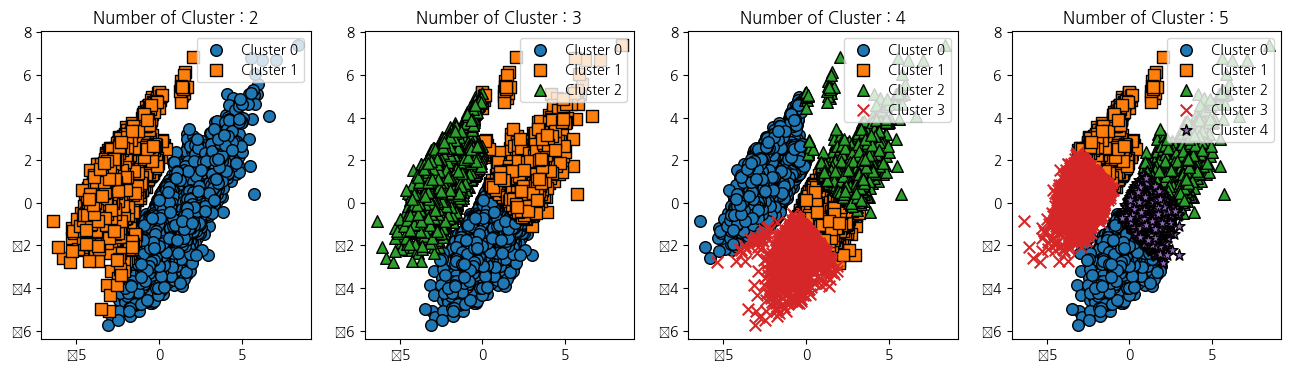

In [15]:
# 실루엣 계수 및 데이터 구성
visualize_silhouette([2, 3, 4, 5], X_features_scaled)
visualize_kmeans_plot_multi([2, 3, 4, 5], X_features_scaled)